# TP2

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - María Fabiana Cid
#### - Yessika Arrieta

In [1]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

TP2 - CLASE 3

▪ Objetivo:
Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan las
cámaras digitales modernas. El video a procesar será: “focus_video.mov”.

▪ Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image
Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:
1. Medición sobre todo el frame.
2. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.
3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores 
arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3) 

Para cada experimento se debe presentar :
- Una curva o varias curvas que muestren la evolución de la métrica frame a frame donde se vea claramente cuando el algoritmo detecto el punto 
de máximo enfoque.
- Video con la ROI o matriz,  graficada en rojo y superpuesta al video original para los frames que no están en foco y verde para los frames
donde se detecta la condición de máximo enfoque.


### 1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:

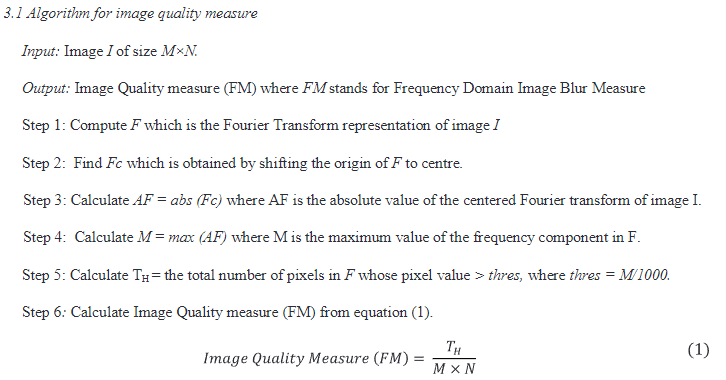

In [4]:
def image_quality_measure(frame):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(frame)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to the center
    Fc = np.fft.fftshift(F)
    
    # Step 3: Calculate AF = abs(Fc) where AF is the absolute value of the centered Fourier transform
    AF = np.abs(Fc)
    
    # Step 4: Calculate M = max(AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > M/1000
    thres = M / 1000
    TH = np.sum(AF > thres)
    
    # Step 6: Calculate Image Quality Measure (FM)
    M, N = frame.shape
    FM = TH / (M * N)
    
    return FM

#### a. Medición sobre todo el frame.

In [ ]:
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    fm_scores = []  # List to store FM values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Call the image quality measure function for the current frame
        fm_value = image_quality_measure(gray_frame)
        
        # Store the FM value and frame number in the respective lists
        fm_scores.append(fm_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: Image Quality Measure (FM) = {fm_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum FM value
    max_fm_value = max(fm_scores)
    max_fm_index = fm_scores.index(max_fm_value)
    
    print(f"Frame with the highest FM score: {max_fm_index} with FM value {max_fm_value}")
    
    # Plot FM score per frame
    plt.plot(frame_numbers, fm_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_fm_index, color='r', linestyle='--', label=f'Max Value at Frame {max_fm_index}')
    plt.title("FM Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("FM Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest FM score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum FM score by drawing a red rectangle
        if frame_number == max_fm_index:
            # Draw a red rectangle on the frame to highlight it
            height, width, _ = frame.shape
            cv.rectangle(frame, (10, 10), (width - 10, height - 10), (0, 0, 255), 5)
            cv.putText(frame, f"Max FM (FM: {max_fm_value:.3f}, Frame {max_fm_index})", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Display the frame
            cv.imshow('Video', frame)
            
            # Pause and wait for a key press to continue
            cv.waitKey(0)  # This will pause the video until any key is pressed
            
        else:
            # Display the frame
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()

#### b. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.

In [7]:
def extract_roi(image, roi_fraction=0.1):
    """Extracts a central region of interest (ROI) covering a given fraction of the frame."""
    height, width = image.shape
    roi_height = int(height * roi_fraction)
    roi_width = int(width * roi_fraction)
    
    # Center coordinates
    center_x, center_y = width // 2, height // 2
    
    # Calculate ROI bounds
    x_start = center_x - roi_width // 2
    y_start = center_y - roi_height // 2
    x_end = center_x + roi_width // 2
    y_end = center_y + roi_height // 2
    
    # Extract and return the ROI
    return image[y_start:y_end, x_start:x_end]

In [ ]:
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    fm_scores = []  # List to store FM values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Extract the central 10% ROI from the frame
        roi_frame = extract_roi(gray_frame, roi_fraction=0.1)
        
        # Call the image quality measure function for the ROI
        fm_value = image_quality_measure(roi_frame)
        
        # Store the FM value and frame number in the respective lists
        fm_scores.append(fm_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: Image Quality Measure (FM) for ROI = {fm_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum FM value
    max_fm_value = max(fm_scores)
    max_fm_index = fm_scores.index(max_fm_value)
    
    print(f"Frame with the highest FM score: {max_fm_index} with FM value {max_fm_value}")

    #Lineplot of FM score per frame
    plt.plot(frame_numbers, fm_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_fm_index, color='r', linestyle='--', label=f'Max Value at Frame {max_fm_index}')
    plt.title("FM Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("FM Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest FM score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum FM score by drawing a red rectangle around the ROI
        if frame_number == max_fm_index:
            # Draw a red rectangle on the frame to highlight the 10% ROI
            height, width, _ = frame.shape
            roi_height = int(height * 0.1)
            roi_width = int(width * 0.1)
            center_x, center_y = width // 2, height // 2
            x_start = center_x - roi_width // 2
            y_start = center_y - roi_height // 2
            x_end = center_x + roi_width // 2
            y_end = center_y + roi_height // 2

            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), (0, 0, 255), 5)
            cv.putText(frame, f"Max FM Frame (FM: {max_fm_value:3f})", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Pause and wait for a key press to continue
            print("Pausing on frame with max FM score. Press any key to continue...")
            cv.imshow('Video', frame)
            cv.waitKey(0)  # Pause until any key is pressed
            
        else:
            # Display the frame without a highlight
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()

#### c. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3)

In [8]:
def image_quality_measure_matrix(frame):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(frame)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to the center
    Fc = np.fft.fftshift(F)
    
    # Step 3: Calculate AF = abs(Fc) where AF is the absolute value of the centered Fourier transform
    AF = np.abs(Fc)
    
    # Step 4: Calculate M = max(AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > M/1000
    thres = M / 200
    TH = np.sum(AF > thres)
    
    # Step 6: Calculate Image Quality Measure (FM)
    M, N = frame.shape
    FM = TH / (M * N)
    
    return FM

In [9]:
def draw_focus_matrix(frame, n, m, square_size, padding=0):
    """Draw a focus matrix of n x m squares, each with size square_size x square_size, with optional padding."""
    height, width = frame.shape[:2]
    
    # Calculate the total matrix size including padding
    matrix_height = n * square_size + (n - 1) * padding
    matrix_width = m * square_size + (m - 1) * padding
    
    # Ensure matrix size does not exceed the frame size
    if matrix_height > height or matrix_width > width:
        print("Matrix size exceeds frame dimensions.")
        return frame, None
    
    # Calculate the top-left corner to center the matrix
    start_y = (height - matrix_height) // 2
    start_x = (width - matrix_width) // 2
    
    focus_matrix = np.zeros((n, m))  # Create an empty focus matrix
    
    # Process each grid cell
    for i in range(n):
        for j in range(m):
            # Calculate the top-left corner of the current grid square
            y_start = start_y + i * (square_size + padding)
            y_end = y_start + square_size
            x_start = start_x + j * (square_size + padding)
            x_end = x_start + square_size
            
            # Ensure ROI is within the frame boundaries
            if y_end > height or x_end > width:
                print(f"ROI out of bounds: {x_start}, {y_start}, {x_end}, {y_end}")
                continue
            
            # Extract the region of interest (ROI) for the current grid square
            roi = frame[y_start:y_end, x_start:x_end]
            
            # Check if the ROI is valid (non-empty)
            if roi.size == 0:
                print(f"Empty ROI at grid ({i}, {j})")
                continue
            
            # Convert the ROI to grayscale
            gray_roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
            
            # Calculate the FM score for the ROI
            fm_value = image_quality_measure_matrix(gray_roi)
            focus_matrix[i, j] = fm_value
            
            # Draw a rectangle and color it based on FM score
            color = (0, 255, 0) if fm_value > 0.3 else (0, 0, 255)  # Green if in focus, red if out of focus
            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), color, 2)
    
    return frame, focus_matrix

In [10]:
def display_video_with_matrix(m, n, square_size=10, padding=10):
    video_path = "focus_video.mov"  # Replace with your video path
    cap = cv.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video.")
    else:
        # Create an array to track FM scores for each grid square
        fm_scores_per_square = [[[] for _ in range(m)] for _ in range(n)]
        frame_number = 0

        while True:
            ret, frame = cap.read()
        
            if not ret:
                print("End of video.")
                break
        
            # Draw the focus matrix on the frame with padding
            processed_frame, focus_matrix = draw_focus_matrix(frame, n, m, square_size, padding)
        
            if focus_matrix is not None:
                # Track FM scores for each grid square
                for i in range(n):
                    for j in range(m):
                        fm_scores_per_square[i][j].append(focus_matrix[i, j])
        
                # Display the frame with the focus matrix
                cv.imshow('Focus Matrix', processed_frame)
        
            frame_number += 1
        
            # Wait for 25 ms between frames (adjust to control playback speed)
            if cv.waitKey(25) & 0xFF == ord('q'):
                break
    
        # Release the video capture object
        cap.release()
        cv.destroyAllWindows()
    
        # Plot all FM scores for each square in a single figure using subplots
        fig, axs = plt.subplots(n, m, figsize=(m * 4, n * 4))  # Create n x m subplots
        
        for i in range(n):
            for j in range(m):
                axs[i, j].plot(fm_scores_per_square[i][j], marker='o', linestyle='-', color='b')
                axs[i, j].set_title(f"Grid ({i}, {j})")
                axs[i, j].set_xlabel("Frame Number")
                axs[i, j].set_ylabel("FM Value")
                axs[i, j].grid(True)
        
        plt.tight_layout()
        plt.show()

##### Matriz de 3x4

In [ ]:
display_video_with_matrix(3, 4, 10, 10)

##### Matriz de 4x5

In [ ]:
display_video_with_matrix(4, 5, 10, 10)

##### Matriz de 5x5

In [ ]:
display_video_with_matrix(5, 5, 10, 10)

## 2. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure operators in shapefrom focus

### 2.1 - Aplicación de otra métrica para medir enfoque:LBP (Local Binary Patterns)

In [ ]:
![image.png](attachment:image.png)

LBP es el que se utiliza para determinar la nitidez de una imagen. Un mayor valor de varianza generalmente indica mayor variación en las texturas locales, lo que implica que la imagen está más enfocada.

Interpretación:
Mayor valor de LBP (máximo): Esto generalmente representa una imagen con más detalles y texturas, lo que indica que está más enfocada. Las áreas nítidas tienen mayor variación en sus patrones binarios.

Menor valor de LBP (mínimo): Esto puede indicar que la imagen tiene menos detalles y texturas, lo que sugiere que está desenfocada o borrosa. Las áreas desenfocadas tienden a tener patrones binarios más uniformes y con menos variabilidad.

Los valores del radio y números de vecinos son hiperparámetros.

In [2]:
from skimage.feature import local_binary_pattern

#### a. Medición sobre todo el frame.

In [ ]:
# Function to calculate the LBP and return the variance (focus measure)
def calculate_lbp_variance(gray_frame, radius=2, n_points=8):
    # Compute LBP
    lbp = local_binary_pattern(gray_frame, n_points, radius, method="uniform")
    
    # Calculate the variance of the LBP, which will serve as the focus measure (LBP)
    lbp_value = np.var(lbp)
    
    return lbp_value

# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    lbp_scores = []  # List to store LBP (focus measure) values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Call the LBP variance function for the current frame
        lbp_value = calculate_lbp_variance(gray_frame)
        
        # Store the LBP value and frame number in the respective lists
        lbp_scores.append(lbp_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: LBP Variance = {lbp_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum FM value
    max_lbp_value = max(lbp_scores)
    max_lbp_index = lbp_scores.index(max_lbp_value)
    
    print(f"Frame with the highest LBP score: {max_lbp_index} with LBP value {max_lbp_value}")
    
    # Plot FM score per frame
    plt.plot(frame_numbers, lbp_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_lbp_index, color='r', linestyle='--', label=f'Max Value at Frame {max_lbp_index}')
    plt.title("LBP Variance Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("LBP Variance ")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest LBP score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum LBP score by drawing a red rectangle
        if frame_number == max_lbp_index:
            # Draw a red rectangle on the frame to highlight it
            height, width, _ = frame.shape
            cv.rectangle(frame, (10, 10), (width - 10, height - 10), (0, 0, 255), 5)
            cv.putText(frame, f"Max LBP (LBP: {max_lbp_value:.3f}, Frame {max_lbp_index})", 
                       (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Display the frame
            cv.imshow('Video', frame)
            
            # Pause and wait for a key press to continue
            cv.waitKey(0)  # This will pause the video until any key is pressed
            
        else:
            # Display the frame
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()


#### b. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.

In [ ]:
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    LBP_scores = []  # List to store LBP values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Extract the central 10% ROI from the frame
        roi_frame = extract_roi(gray_frame, roi_fraction=0.1)
        
        # Call the LBP Variance measure function for the ROI
        LBP_value = calculate_lbp_variance(roi_frame)
        
        # Store the LBP value and frame number in the respective lists
        LBP_scores.append(LBP_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: LBP Variance measure (LBP) for ROI = {LBP_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum LBP value
    max_LBP_value = max(LBP_scores)
    max_LBP_index = LBP_scores.index(max_LBP_value)
    
    print(f"Frame with the highest LBP score: {max_LBP_index} with LBP value {max_LBP_value}")

    #Lineplot of LBP score per frame
    plt.plot(frame_numbers, LBP_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_LBP_index, color='r', linestyle='--', label=f'Max Value at Frame {max_LBP_index}')
    plt.title("LBP Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("LBP Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest LBP score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum LBP score by drawing a red rectangle around the ROI
        if frame_number == max_LBP_index:
            # Draw a red rectangle on the frame to highlight the 10% ROI
            height, width, _ = frame.shape
            roi_height = int(height * 0.1)
            roi_width = int(width * 0.1)
            center_x, center_y = width // 2, height // 2
            x_start = center_x - roi_width // 2
            y_start = center_y - roi_height // 2
            x_end = center_x + roi_width // 2
            y_end = center_y + roi_height // 2

            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), (0, 0, 255), 5)
            cv.putText(frame, f"Max LBP Frame (LBP: {max_LBP_value:3f})", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Pause and wait for a key press to continue
            print("Pausing on frame with max LBP score. Press any key to continue...")
            cv.imshow('Video', frame)
            cv.waitKey(0)  # Pause until any key is pressed
            
        else:
            # Display the frame without a highlight
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()

#### c. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3)

In [50]:
def draw_focus_matrix(frame, n, m, square_size, padding):
    """Draw a focus matrix of n x m squares, each with size square_size x square_size, with optional padding."""
    height, width = frame.shape[:2]
    
    # Calculate the total matrix size including padding
    matrix_height = n * square_size + (n - 1) * padding
    matrix_width = m * square_size + (m - 1) * padding
    
    # Ensure matrix size does not exceed the frame size
    if matrix_height > height or matrix_width > width:
        print("Matrix size exceeds frame dimensions.")
        return frame, None
    
    # Calculate the top-left corner to center the matrix
    start_y = (height - matrix_height) // 2
    start_x = (width - matrix_width) // 2
    
    focus_matrix = np.zeros((n, m))  # Create an empty focus matrix
    
    # Process each grid cell
    for i in range(n):
        for j in range(m):
            # Calculate the top-left corner of the current grid square
            y_start = start_y + i * (square_size + padding)
            y_end = y_start + square_size
            x_start = start_x + j * (square_size + padding)
            x_end = x_start + square_size
            
            # Ensure ROI is within the frame boundaries
            if y_end > height or x_end > width:
                print(f"ROI out of bounds: {x_start}, {y_start}, {x_end}, {y_end}")
                continue
            
            # Extract the region of interest (ROI) for the current grid square
            roi = frame[y_start:y_end, x_start:x_end]
            
            # Check if the ROI is valid (non-empty)
            if roi.size == 0:
                print(f"Empty ROI at grid ({i}, {j})")
                continue
            
            # Convert the ROI to grayscale
            gray_roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
            
            # Calculate the LBP score for the ROI
            LBP_value = calculate_lbp_variance(gray_roi,radius=1, n_points=16)
            focus_matrix[i, j] = LBP_value
            
            # Draw a rectangle and color it based on LBP score
            color = (0, 255, 0) if LBP_value > 10 else (0, 0, 255)  # Green if in focus, red if out of focus
            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), color, 2)
    
    return frame, focus_matrix

In [11]:
def display_video_with_matrix(m, n, square_size=10, padding=10):
    video_path = "focus_video.mov"  # Replace with your video path
    cap = cv.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video.")
    else:
        # Create an array to track LBP scores for each grid square
        LBP_scores_per_square = [[[] for _ in range(m)] for _ in range(n)]
        frame_number = 0

        while True:
            ret, frame = cap.read()
        
            if not ret:
                print("End of video.")
                break
        
            # Draw the focus matrix on the frame with padding
            processed_frame, focus_matrix = draw_focus_matrix(frame, n, m, square_size, padding)
        
            if focus_matrix is not None:
                # Track LBP scores for each grid square
                for i in range(n):
                    for j in range(m):
                        LBP_scores_per_square[i][j].append(focus_matrix[i, j])
        
                # Display the frame with the focus matrix
                cv.imshow('Focus Matrix', processed_frame)
        
            frame_number += 1
        
            # Wait for 25 ms between frames (adjust to control playback speed)
            if cv.waitKey(25) & 0xFF == ord('q'):
                break
    
        # Release the video capture object
        cap.release()
        cv.destroyAllWindows()
    
        # Plot all LBP scores for each square in a single figure using subplots
        fig, axs = plt.subplots(n, m, figsize=(m * 4, n * 4))  # Create n x m subplots
        
        for i in range(n):
            for j in range(m):
                axs[i, j].plot(LBP_scores_per_square[i][j], marker='o', linestyle='-', color='b')
                axs[i, j].set_title(f"Grid ({i}, {j})")
                axs[i, j].set_xlabel("Frame Number")
                axs[i, j].set_ylabel("LBP Value")
                axs[i, j].grid(True)
        
        plt.tight_layout()
        plt.show()

##### Matriz de 3x4

In [ ]:
display_video_with_matrix(3, 4, 10, 10)

##### Matriz de 4X4

In [ ]:
display_video_with_matrix(4, 4, 10, 10)

##### Matriz de 5x5

In [ ]:
display_video_with_matrix(5, 5, 10, 10)

### 2.2 - Aplicación de otra métrica para medir enfoque: ACMo

In [ ]:
def calculate_acmo(L, P_k):


   # Define the values ​​of k as a sequence from 0 to L-1 (for a grayscale image, L = 256)
   k_values = np.arange(0, L)
  
   # Calculate the weighted average (mu)
   mu = np.sum(k_values * P_k)
  
   # Calculate ACMo ß
   acmo = np.sum(np.abs(k_values - mu) * P_k)
  
   return acmo
  
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)


if not cap.isOpened():
   print("Error: Cannot open video.")
else:
   acmo_scores = []  # List to store ACMo (focus measure) values
   frame_number = 0
   frame_numbers = []  # List to store frame numbers
  
   while True:
       # Read frame by frame
       ret, frame = cap.read()
      
       # If there are no more frames to read, break the loop
       if not ret:
           print("End of video or error reading video.")
           break
      
       # Convert the frame to grayscale
       gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
       # Calculate the intensity histogram
       hist = cv.calcHist([gray_frame], [0], None, [256], [0, 256])

       if hist.sum() == 0:
            print(f"Frame {frame_number}: El histograma está vacío o es incorrecto.")
            continue


       # Normalize the histogram to obtain the probabilities P_k
       P_k = hist.ravel() / hist.sum()

       # Comprobar si el histograma tiene la forma correcta
       if len(P_k) != 256:
            print(f"Frame {frame_number}: El histograma no tiene la dimensión correcta.")
            continue
      
       # Call the ACMo function for the current frame
       acmo = calculate_acmo(256, P_k)
      
       # Store the ACMo value and frame number in the respective lists
       acmo_scores.append(acmo)
       frame_numbers.append(frame_number)
      
       print(f"Frame {frame_number}: ACMo = {acmo}")
      
       # Increment frame number
       frame_number += 1
  
   # Release the video capture object
   cap.release()
   cv.destroyAllWindows()
  
   # Find the frame with the maximum FM value
   max_lbp_value = max(acmo_scores)
   max_lbp_index = acmo_scores.index(max_lbp_value)
  
   print(f"Frame with the highest ACMo score: {max_lbp_index} with ACMo value {max_lbp_value}")
  
   # Plot FM score per frame
   plt.plot(frame_numbers, acmo_scores, marker='o', linestyle='-', color='b')
   plt.axvline(x=max_lbp_index, color='r', linestyle='--', label=f'Max Value at Frame {max_lbp_index}')
   plt.title("ACMo Score per Frame")
   plt.xlabel("Frame Number")
   plt.ylabel("ACMo")
   plt.grid(True)
   plt.legend()
   plt.show()


   # Play the video and highlight the frame with the highest ACMo score
   cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
   frame_number = 0
   while True:
       ret, frame = cap.read()
       if not ret:
           print("End of video.")
           break
      
       # Highlight the frame with the maximum ACMo score by drawing a red rectangle
       if frame_number == max_lbp_index:
           # Draw a red rectangle on the frame to highlight it
           height, width, _ = frame.shape
           cv.rectangle(frame, (10, 10), (width - 10, height - 10), (0, 0, 255), 5)
           cv.putText(frame, f"Max ACMo (ACMo: {max_lbp_value:.3f}, Frame {max_lbp_index})",
                      (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
           cv.imshow('Video', frame)
          
           # Pause and wait for a key press to continue
           cv.waitKey(0)  # This will pause the video until any key is pressed
          
       else:
           # Display the frame
           cv.imshow('Video', frame)
      
       # Wait for 25 ms between frames (adjust to control playback speed)
       if cv.waitKey(25) & 0xFF == ord('q'):
           break
      
       # Increment frame number
       frame_number += 1
  
   # Release the video capture object
   cap.release()
   cv.destroyAllWindows()